In [1]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 650.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/3

In [3]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.3 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=2fa1401d17457a7536211dbf18acfbe047ead9f15b8eec127f1fb3ea1342259e
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=9efd63c3bb3f044f67fc953874f1a581bef5474fc6d070f806184fcb8dc405aa
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [11]:
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

arxiv_wrapper = ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(arxiv_wrapper=arxiv_wrapper)

wiki_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_wrapper)

In [13]:
wiki_tool.invoke("Who is Elon Musk?")

'Page: Family of Elon Musk\nSummary: The family of Elon Musk includes his mother Maye Musk, a model and author, his father Errol Musk, a businessman and politician, his siblings Kimbal Musk  and Tosca Musk, and his cousin Lyndon Rive. His ex-wives are Justine Musk and Talulah Riley.'

In [14]:
arxiv_tool.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\n

In [15]:
tools=[arxiv_tool,wiki_tool]

In [16]:
from typing import Annotated
from typing_extensions import TypedDict

In [17]:
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]


In [18]:
from langgraph.graph import StateGraph,START,END

In [19]:
graph_builder = StateGraph(State)

In [20]:
from langchain_groq import ChatGroq
from google.colab import userdata

groq_api_key = userdata.get('groq_api_key')

In [21]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="gpt-4")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b492b1fe6e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b492b1fd4b0>, model_name='gpt-4', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [22]:
llm_with_tool = llm.bind_tools(tools=tools)

In [23]:
def chatbot(state:State):
  return {"messages":[llm_with_tool.invoke(state["messages"])]}

In [24]:
from langgraph.prebuilt import ToolNode,tools_condition

In [25]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools",tool_node)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge(START,"tools")
graph_builder.add_edge("chatbot",END)

In [26]:
graph = graph_builder.compile()


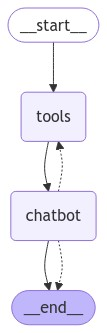

In [28]:
from IPython.display import display,Image

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [ ]:
graph.invoke({"messages":[{"role":"user","content":"Who is Elon Musk?"}]})

In [ ]:
# prompt: code for running the  chatbot with use_input which is customized

from langgraph.graph import user_input

def run_chatbot_with_input(input_message):
  state = {"messages": [input_message]}
  result = graph.run(state)
  return result["messages"][-1]

# Example usage:
user_input = "Who is Elon Musk and what is the latest about transformers?"
response = run_chatbot_with_input(user_input)
print(response)
